# Pandas の Groupby の使い方をまとめる

最近よく Groupby を使うので、何ができるのかをまとめる

In [173]:
import pandas as pd
import numpy as np
import japanize_matplotlib

In [174]:
df = pd.DataFrame({'Animal': ['Falcon', 'Parrot', 'Falcon', 'Parrot',
                              'Falcon', 'Falcon', 'Parrot'],
                   'Max Speed': [375, 20, 380., 23., 370, 390, 26.],
                   'Weight': [1.0, 2.2, 0.9, 2.0, 1.2, 1.1, 2.5]})
print(df)

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
1  Parrot       20.0     2.2
2  Falcon      380.0     0.9
3  Parrot       23.0     2.0
4  Falcon      370.0     1.2
5  Falcon      390.0     1.1
6  Parrot       26.0     2.5


In [175]:
date_times = pd.to_datetime(["2021-01-01", "2021-01-02", "2021-01-03", "2021-01-04","2021-01-05", "2021-01-06", "2021-01-07"])
max_temp = [10, 11, 9, 9.3, 10.2, 12, 8.3]
max_hum = [12, 14, 11, 12.3, 11.2, 14.3, 15]

df_time = pd.DataFrame({"最高気温": max_temp, "最高湿度": max_hum}, index=date_times)
df_time = df_time.melt(var_name="変数", value_name="値", ignore_index=False)
print(df_time)

              変数     値
2021-01-01  最高気温  10.0
2021-01-02  最高気温  11.0
2021-01-03  最高気温   9.0
2021-01-04  最高気温   9.3
2021-01-05  最高気温  10.2
2021-01-06  最高気温  12.0
2021-01-07  最高気温   8.3
2021-01-01  最高湿度  12.0
2021-01-02  最高湿度  14.0
2021-01-03  最高湿度  11.0
2021-01-04  最高湿度  12.3
2021-01-05  最高湿度  11.2
2021-01-06  最高湿度  14.3
2021-01-07  最高湿度  15.0


# Indexing, iteration

In [176]:
# __iter__() はグループごとのデータフレームを繰り返し取り出すことのできるイテレータを返す
for group, df_group in df.groupby("Animal").__iter__():
    print(f"グループ名: {group}")
    print(df_group)
    print()

グループ名: Falcon
   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
2  Falcon      380.0     0.9
4  Falcon      370.0     1.2
5  Falcon      390.0     1.1

グループ名: Parrot
   Animal  Max Speed  Weight
1  Parrot       20.0     2.2
3  Parrot       23.0     2.0
6  Parrot       26.0     2.5



In [177]:
# groups はグループごとのインデックスを辞書で返す
print(df.groupby("Animal").groups)

{'Falcon': [0, 2, 4, 5], 'Parrot': [1, 3, 6]}


In [178]:
# groups はグループごとのインデックスを辞書で返す
print(list(df.groupby("Animal").groups.keys()))

['Falcon', 'Parrot']


In [179]:
# indices はグループごとのインデックス（numpy の ndarray 型）を辞書で返す
print(df.groupby("Animal").indices)
print(type(df.groupby("Animal").indices["Falcon"]))

{'Falcon': array([0, 2, 4, 5]), 'Parrot': array([1, 3, 6])}
<class 'numpy.ndarray'>


In [180]:
# get_group() は指定したグループのデータフレームを返す
print(df.groupby("Animal").get_group("Falcon"))

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
2  Falcon      380.0     0.9
4  Falcon      370.0     1.2
5  Falcon      390.0     1.1


# Function application

In [181]:
# apply は列ごとに指定した関数の処理を実施することができる（ Groupby に指定した列も処理の対象）
print(df.groupby("Animal").apply(max))

        Animal  Max Speed  Weight
Animal                           
Falcon  Falcon      390.0     1.2
Parrot  Parrot       26.0     2.5


In [182]:
def max(x):
    return x.max()

print(df.groupby("Animal").apply(max))

        Animal  Max Speed  Weight
Animal                           
Falcon  Falcon      390.0     1.2
Parrot  Parrot       26.0     2.5


In [183]:
def add(x):
    return x + 100

print(df.groupby("Animal").apply(add))

   Max Speed  Weight
0      475.0   101.0
1      120.0   102.2
2      480.0   100.9
3      123.0   102.0
4      470.0   101.2
5      490.0   101.1
6      126.0   102.5


In [184]:
def add(x):
    return pd.concat([x, x + 100], axis=1)

print(df.groupby("Animal").apply(add))

          Max Speed  Weight  Max Speed  Weight
Animal                                        
Falcon 0      375.0     1.0      475.0   101.0
       2      380.0     0.9      480.0   100.9
       4      370.0     1.2      470.0   101.2
       5      390.0     1.1      490.0   101.1
Parrot 1       20.0     2.2      120.0   102.2
       3       23.0     2.0      123.0   102.0
       6       26.0     2.5      126.0   102.5


In [185]:
# 処理対象の列を指定できる（指定した列が1列の場合は Seriesを、2列以上の場合は DataFrame を返す）
df.groupby("Animal")["Max Speed"].apply(np.mean)

Animal
Falcon    378.75
Parrot     23.00
Name: Max Speed, dtype: float64

In [186]:
# 処理対象の列を指定できる（指定した列が1列の場合は Seriesを、2列以上の場合は DataFrame を返す）
df.groupby("Animal")[["Max Speed", "Weight"]].apply(np.mean)

,Max Speed,Weight
Animal,,
Falcon,378.75,1.050000
Parrot,23.00,2.233333


In [187]:
# agg は列ごとに指定した関数の処理を実施することができる（ Groupby に指定した列は処理の対象外）
df.groupby("Animal").agg(np.mean)

,Max Speed,Weight
Animal,,
Falcon,378.75,1.050000
Parrot,23.00,2.233333


In [188]:
# agg は処理対象の列を指定できる（指定した列が1列の場合は Seriesを、2列以上の場合は DataFrame を返す）
df.groupby("Animal")["Max Speed"].agg(np.mean)

Animal
Falcon    378.75
Parrot     23.00
Name: Max Speed, dtype: float64

In [189]:
df.groupby("Animal").agg([max, np.mean])

Max Speed         Weight          
             max    mean    max      mean
Animal                                   
Falcon     390.0  378.75    1.2  1.050000
Parrot      26.0   23.00    2.5  2.233333

In [190]:
# Transform は 元のDataFrame（もしくは Series）と同じ大きさで結果を返す
df.groupby("Animal").transform(max)

,Max Speed,Weight
0,390.0,1.2
1,26.0,2.5
2,390.0,1.2
3,26.0,2.5
4,390.0,1.2
5,390.0,1.2
6,26.0,2.5


In [191]:
# Transform は 元のDataFrame（もしくは Series）と同じ大きさで結果を返す
df.groupby("Animal").transform(np.mean)

,Max Speed,Weight
0,378.75,1.050000
1,23.00,2.233333
2,378.75,1.050000
3,23.00,2.233333
4,378.75,1.050000
5,378.75,1.050000
6,23.00,2.233333


In [192]:
# Groupby の結果を用いて、複数の関数で処理をするときには pipe を使うと可読性が上がる

# グループごとの最大値を取る
def f(df):
    return df.agg(max)

# 指定された列の大きい方のグループ名を返す
def h(df, colname):
    max_index = df[colname].argmax()
    return df.index[max_index]
    
"""
h(f(df.groupby("Animal")), colname="Max Speed")
と同じ処理をしているが、可読性は pipe を用いた方が圧倒的に良い
"""
df.groupby("Animal").pipe(f).pipe(h, colname="Max Speed")

'Falcon'

# Computations / descriptive stats

In [193]:
df_2 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [True, True, False, False],
                   'Weight': [True, False, False, True]})
df_2

,Animal,Max Speed,Weight
0,Falcon,True,True
1,Falcon,True,False
2,Parrot,False,False
3,Parrot,False,True


In [194]:
# all は各グループの各列の要素が全て True なら True を返し、一つでも False があるなら False を返す（ and 演算）
df_2.groupby("Animal").all()

,Max Speed,Weight
Animal,,
Falcon,True,False
Parrot,False,False


In [195]:
# any は各グループの各列の要素に一つでも True なら True を返し、全て False なら False を返す（ or 演算）
df_2.groupby("Animal").any()

,Max Speed,Weight
Animal,,
Falcon,True,True
Parrot,False,True


In [196]:
df_3 = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot',
                              'Falcon', 'Parrot', 'Parrot'],
                   'Max Speed': [None, None, 30., 370., None, 26.],
                   'Weight': [1.0, 0.8, 2.2, None, None, None]})
print(df_3)

   Animal  Max Speed  Weight
0  Falcon        NaN     1.0
1  Falcon        NaN     0.8
2  Parrot       30.0     2.2
3  Falcon      370.0     NaN
4  Parrot        NaN     NaN
5  Parrot       26.0     NaN


In [197]:
def isnull(x, how="any"):
    if how == "any":
        return x.isnull().any()
    elif how == "all":
        return x.isnull().all()

print(df_3.groupby("Animal").agg(isnull, how="any"))

        Max Speed  Weight
Animal                   
Falcon       True    True
Parrot       True    True


In [198]:
def null_counter(x):
    return x.isnull().sum()
    
# 一つでも欠測値を含むかどうかを確認するとき
print(df_3.groupby("Animal").agg(null_counter))

        Max Speed  Weight
Animal                   
Falcon        2.0     1.0
Parrot        1.0     2.0


In [199]:
# bfill は欠測値を後ろ向きに同じ値で補間する。データの後方が欠測している場合は補間されない。
print(df_3.groupby("Animal").bfill())

   Max Speed  Weight
0      370.0     1.0
1      370.0     0.8
2       30.0     2.2
3      370.0     NaN
4       26.0     NaN
5       26.0     NaN


In [200]:
# backfill は bfill と同じ処理（プログラム的にも同じ処理）
df_3.groupby("Animal").backfill()

,Max Speed,Weight
0,370.0,1.0
1,370.0,0.8
2,30.0,2.2
3,370.0,NaN
4,26.0,NaN
5,26.0,NaN


In [201]:
# ffill は欠測値を前向きに同じ値で補間する。欠測値から始まる場合は補間されない
print(df_3.groupby("Animal").ffill())

   Max Speed  Weight
0        NaN     1.0
1        NaN     0.8
2       30.0     2.2
3      370.0     0.8
4       30.0     2.2
5       26.0     2.2


In [202]:
# 前向き補間と後ろ向き補間の両方を適用することで、全ての欠測値を補間できる
print(df_3.groupby("Animal").ffill().bfill())

   Max Speed  Weight
0       30.0     1.0
1       30.0     0.8
2       30.0     2.2
3      370.0     0.8
4       30.0     2.2
5       26.0     2.2


In [203]:
def interpolate(x):
    return x.interpolate(limit_direction="both")

print(df_3.groupby("Animal").transform(interpolate))

   Max Speed  Weight
0      370.0     1.0
1      370.0     0.8
2       30.0     2.2
3      370.0     0.8
4       28.0     2.2
5       26.0     2.2


In [204]:
# pad で欠測値を前向きに同じ値で補間する。limit で補間する数を指定できる（ffill と同じ）
df_3.groupby("Animal").pad()

,Max Speed,Weight
0,NaN,1.0
1,NaN,0.8
2,30.0,2.2
3,370.0,0.8
4,30.0,2.2
5,26.0,2.2


In [205]:
# pad で欠測値を前向きに同じ値で補間する。limit で補間する数を指定できる
df_3.groupby("Animal").pad(limit=1)

,Max Speed,Weight
0,NaN,1.0
1,NaN,0.8
2,30.0,2.2
3,370.0,0.8
4,30.0,2.2
5,26.0,NaN


In [206]:
# count は、各グループの各列に存在する欠測値の数を取得できる
print(df.groupby("Animal").count())

        Max Speed  Weight
Animal                   
Falcon          4       4
Parrot          3       3


In [207]:
df_4 = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot', 'Falcon', 'Parrot', 'Parrot']})
print(df_4)

   Animal
0  Falcon
1  Falcon
2  Parrot
3  Falcon
4  Parrot
5  Parrot


In [208]:
# cumcount はグループの出現順序を保持したまま、各グループの出現順を取得できる
df.groupby("Animal").cumcount()

0    0
1    0
2    1
3    1
4    2
5    3
6    2
dtype: int64

In [209]:
# ascending = False とすることで、数字を反転できる。
df.groupby("Animal").cumcount(ascending=False)

0    3
1    2
2    2
3    1
4    1
5    0
6    0
dtype: int64

In [210]:
# ngroup でグループごとに番号を振ることができる
df.groupby("Animal").ngroup()

0    0
1    1
2    0
3    1
4    0
5    0
6    1
dtype: int64

In [211]:
df.groupby("Animal").ngroup(ascending=False)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
dtype: int64

In [212]:
df_5 = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Falcon', 'Falcon',
                              'Parrot', 'Parrot', 'Parrot'],
                   'Max Speed': [375, 380, 370., 375., 20, 23, 26.],
                   'Weight': [1.0, 0.8, 0.9, 0.95, 2.2, 2.0, 2.5]})
print(df_5)

   Animal  Max Speed  Weight
0  Falcon      375.0    1.00
1  Falcon      380.0    0.80
2  Falcon      370.0    0.90
3  Falcon      375.0    0.95
4  Parrot       20.0    2.20
5  Parrot       23.0    2.00
6  Parrot       26.0    2.50


In [213]:
# cummax は、グループごとに累積最大値を取ることができる
print(df.groupby("Animal").cummax())

   Max Speed  Weight
0      375.0     1.0
1       20.0     2.2
2      380.0     1.0
3       23.0     2.2
4      380.0     1.2
5      390.0     1.2
6       26.0     2.5


In [214]:
# cummin は、グループごとに累積最小値を取ることができる
print(df.groupby("Animal").cummin())

   Max Speed  Weight
0      375.0     1.0
1       20.0     2.2
2      375.0     0.9
3       20.0     2.0
4      370.0     0.9
5      370.0     0.9
6       20.0     2.0


In [215]:
# cumprod は、グループごとに累積積を取ることができる
print(df.groupby("Animal").cumprod())

      Max Speed  Weight
0  3.750000e+02   1.000
1  2.000000e+01   2.200
2  1.425000e+05   0.900
3  4.600000e+02   4.400
4  5.272500e+07   1.080
5  2.056275e+10   1.188
6  1.196000e+04  11.000


In [216]:
# cumsum は、グループごとに累積和を取ることができる
print(df.groupby("Animal").cumsum())

   Max Speed  Weight
0      375.0     1.0
1       20.0     2.2
2      755.0     1.9
3       43.0     4.2
4     1125.0     3.1
5     1515.0     4.2
6       69.0     6.7


In [217]:
# first は各グループの最初の行を取得できる
print(df.groupby("Animal").first())

        Max Speed  Weight
Animal                   
Falcon      375.0     1.0
Parrot       20.0     2.2


In [218]:
# last は各グループの最後の行を取得できる
print(df.groupby("Animal").last())

        Max Speed  Weight
Animal                   
Falcon      390.0     1.1
Parrot       26.0     2.5


In [219]:
# min_count で規定数未満の行数しかないデータは欠測値を返す
print(df.groupby("Animal").first(min_count=4))

        Max Speed  Weight
Animal                   
Falcon      375.0     1.0
Parrot        NaN     NaN


In [220]:
# head で先頭から N 行目までを取得できる
print(df.groupby("Animal").head(3))

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
1  Parrot       20.0     2.2
2  Falcon      380.0     0.9
3  Parrot       23.0     2.0
4  Falcon      370.0     1.2
6  Parrot       26.0     2.5


In [221]:
# tail で末尾から N 行目までを取得できる
print(df.groupby("Animal").tail(3))

   Animal  Max Speed  Weight
1  Parrot       20.0     2.2
2  Falcon      380.0     0.9
3  Parrot       23.0     2.0
4  Falcon      370.0     1.2
5  Falcon      390.0     1.1
6  Parrot       26.0     2.5


In [222]:
# nth でグループごとに n 番目のデータを取得できる
print(df.groupby("Animal").nth(2))

        Max Speed  Weight
Animal                   
Falcon      370.0     1.2
Parrot       26.0     2.5


In [223]:
# nth でグループごとに n 番目のデータを取得できる（リストで複数列の取得ができる）
print(df.groupby("Animal").nth([0, 2]))

        Max Speed  Weight
Animal                   
Falcon      375.0     1.0
Falcon      370.0     1.2
Parrot       20.0     2.2
Parrot       26.0     2.5


In [224]:
# take でグループごとにインデックスを指定して、データを取り出せる
print(df.groupby("Animal").take([0, 2]))

          Max Speed  Weight
Animal                     
Falcon 0      375.0     1.0
       4      370.0     1.2
Parrot 1       20.0     2.2
       6       26.0     2.5


In [225]:
# axis=1 を指定することで、n 番目の列を取り出せる
print(df.groupby("Animal").take([1], axis=1))

   Weight
0     1.0
1     2.2
2     0.9
3     2.0
4     1.2
5     1.1
6     2.5


In [226]:
# max で各グループごとに最大値を取得できる。
print(df.groupby("Animal").max())

        Max Speed  Weight
Animal                   
Falcon      390.0     1.2
Parrot       26.0     2.5


In [227]:
# max で各グループごとに最大値を取得できる。min_count で規定数未満のグループは NaN を返す
df_5.groupby("Animal").max(min_count=4)

,Max Speed,Weight
Animal,,
Falcon,380.0,1.0
Parrot,NaN,NaN


In [228]:
# min で各グループごとに最小値を取得できる。
print(df.groupby("Animal").min())

        Max Speed  Weight
Animal                   
Falcon      370.0     0.9
Parrot       20.0     2.0


In [229]:
# median で各グループごとに中央値を取得できる。
print(df.groupby("Animal").median())

        Max Speed  Weight
Animal                   
Falcon      377.5    1.05
Parrot       23.0    2.20


In [230]:
# mean で各グループごとに平均値を取得できる。
print(df.groupby("Animal").mean())

        Max Speed    Weight
Animal                     
Falcon     378.75  1.050000
Parrot      23.00  2.233333


In [231]:
# ohlc で四本値（始値、高値、安値、終値）を取得できる。（数値列のみを指定する必要あり）
print(df.groupby("Animal")[["Max Speed", "Weight"]].ohlc())

       Max Speed                      Weight                
            open   high    low  close   open high  low close
Animal                                                      
Falcon     375.0  390.0  370.0  390.0    1.0  1.2  0.9   1.1
Parrot      20.0   26.0   20.0   26.0    2.2  2.5  2.0   2.5


In [232]:
# prod でグループごとの総乗を求めることができる
print(df.groupby("Animal").prod())

           Max Speed  Weight
Animal                      
Falcon  2.056275e+10   1.188
Parrot  1.196000e+04  11.000


In [233]:
# prod でグループごとの総和を求めることができる
print(df.groupby("Animal").sum())

        Max Speed  Weight
Animal                   
Falcon     1515.0     4.2
Parrot       69.0     6.7


In [234]:
# rank でグループごとに要素の順番を求めることができる
print(df.groupby("Animal").rank())

   Max Speed  Weight
0        2.0     2.0
1        1.0     2.0
2        3.0     1.0
3        2.0     1.0
4        1.0     4.0
5        4.0     3.0
6        3.0     3.0


In [235]:
# pct=True でパーセンテージ表記にできる
print(df.groupby("Animal").rank(pct=True))

   Max Speed    Weight
0   0.500000  0.500000
1   0.333333  0.666667
2   0.750000  0.250000
3   0.666667  0.333333
4   0.250000  1.000000
5   1.000000  0.750000
6   1.000000  1.000000


In [236]:
# method="min" で同率の場合は最小順位を採用する（デフォルトは平均値）
print(df.groupby("Animal").rank(method="min"))

   Max Speed  Weight
0        2.0     2.0
1        1.0     2.0
2        3.0     1.0
3        2.0     1.0
4        1.0     4.0
5        4.0     3.0
6        3.0     3.0


In [237]:
# method="max" で同率の場合は最大順位を採用する（デフォルトは平均値）
print(df.groupby("Animal").rank(method="max"))

   Max Speed  Weight
0        2.0     2.0
1        1.0     2.0
2        3.0     1.0
3        2.0     1.0
4        1.0     4.0
5        4.0     3.0
6        3.0     3.0


In [238]:
# method="first" で同率の場合は最初に出現した要素を優先する
print(df.groupby("Animal").rank(method="first"))

   Max Speed  Weight
0        2.0     2.0
1        1.0     2.0
2        3.0     1.0
3        2.0     1.0
4        1.0     4.0
5        4.0     3.0
6        3.0     3.0


In [239]:
# method="dense"" で同率の場合は最小順位を採用するが、ランクの上昇幅は1に制限される
# 同率2位の要素が二つあった場合、次の順位は4位ではなく、3位になる
print(df.groupby("Animal").rank(method="dense"))

   Max Speed  Weight
0        2.0     2.0
1        1.0     2.0
2        3.0     1.0
3        2.0     1.0
4        1.0     4.0
5        4.0     3.0
6        3.0     3.0


In [240]:
# ascending=False で大きい順に順位をつける
print(df.groupby("Animal").rank(ascending=False))

   Max Speed  Weight
0        3.0     3.0
1        3.0     2.0
2        2.0     4.0
3        2.0     3.0
4        4.0     1.0
5        1.0     2.0
6        1.0     1.0


In [241]:
# diff でグループごとに差分値を求める
df_5.groupby("Animal").diff()

,Max Speed,Weight
0,NaN,NaN
1,5.0,-0.20
2,-10.0,0.10
3,5.0,0.05
4,NaN,NaN
5,3.0,-0.20
6,3.0,0.50


In [242]:
# pct_change でグループごとに変化率を求める
df_5.groupby("Animal").pct_change()

,Max Speed,Weight
0,NaN,NaN
1,0.013333,-0.200000
2,-0.026316,0.125000
3,0.013514,0.055556
4,NaN,NaN
5,0.150000,-0.090909
6,0.130435,0.250000


In [243]:
# size でグループごとの大きさを取得できる
print(df.groupby("Animal").size())

Animal
Falcon    4
Parrot    3
dtype: int64


In [244]:
# sem でグループごとに標準誤差を求めることができる（デフォルトで不変標準偏差を用いるようになっている）
print(df.groupby("Animal").sem())

        Max Speed    Weight
Animal                     
Falcon   4.269563  0.064550
Parrot   1.732051  0.145297


In [245]:
# ddof で標準偏差を計算するときの自由度を調整できる
df_5.groupby("Animal").sem(ddof=0)

,Max Speed,Weight
Animal,,
Falcon,1.767767,0.036975
Parrot,1.414214,0.118634


In [246]:
# std でグループごとに不変標準偏差を求めることができる
print(df.groupby("Animal").std())

        Max Speed    Weight
Animal                     
Falcon   8.539126  0.129099
Parrot   3.000000  0.251661


In [247]:
# var で不偏分散を求めることができる
print(df.groupby("Animal").var())

        Max Speed    Weight
Animal                     
Falcon  72.916667  0.016667
Parrot   9.000000  0.063333


In [248]:
# corr でグループごとに相関係数を求めることができる
print(df.groupby("Animal").corr())

                  Max Speed    Weight
Animal                               
Falcon Max Speed   1.000000 -0.226779
       Weight     -0.226779  1.000000
Parrot Max Speed   1.000000  0.596040
       Weight      0.596040  1.000000


In [249]:
# cov でグループごとに共分散行列を求めることができる
print(df.groupby("Animal").cov())

                  Max Speed    Weight
Animal                               
Falcon Max Speed  72.916667 -0.250000
       Weight     -0.250000  0.016667
Parrot Max Speed   9.000000  0.450000
       Weight      0.450000  0.063333


In [250]:
# mad で、平均絶対偏差を取ることができる
print(df.groupby("Animal").mad())

        Max Speed    Weight
Animal                     
Falcon       6.25  0.100000
Parrot       2.00  0.177778


In [251]:
# quantile で50パーセンタイルを取得できる（中央値と一緒）
df_5.groupby("Animal").quantile()

,Max Speed,Weight
Animal,,
Falcon,375.0,0.925
Parrot,23.0,2.200


In [252]:
# q で任意のパーセンタイルを取得できる
df.groupby("Animal").quantile(q=0.1)

,Max Speed,Weight
Animal,,
Falcon,371.5,0.93
Parrot,20.6,2.04


In [253]:
# 複数のパーセンタイルも取得できる
print(df.groupby("Animal").quantile(q=[0.1, 0.8]))

            Max Speed  Weight
Animal                       
Falcon 0.1      371.5    0.93
       0.8      384.0    1.14
Parrot 0.1       20.6    2.04
       0.8       24.8    2.38


In [254]:
# skew で尖度を取得できる
print(df.groupby("Animal").skew())

        Max Speed    Weight
Animal                     
Falcon   0.752837  0.000000
Parrot   0.000000  0.585583


In [255]:
# describe でグループごとの基本統計量を確認できる
print(df.groupby("Animal").describe())

       Max Speed                                                       Weight  \
           count    mean       std    min     25%    50%    75%    max  count   
Animal                                                                          
Falcon       4.0  378.75  8.539126  370.0  373.75  377.5  382.5  390.0    4.0   
Parrot       3.0   23.00  3.000000   20.0   21.50   23.0   24.5   26.0    3.0   

                                                          
            mean       std  min    25%   50%    75%  max  
Animal                                                    
Falcon  1.050000  0.129099  0.9  0.975  1.05  1.125  1.2  
Parrot  2.233333  0.251661  2.0  2.100  2.20  2.350  2.5  


In [256]:
# filter は、与えた関数内で定義された条件を満たしたグループのデータを返す
# 以下は、グループごとに最高スピードが300を超えるものだけを取り出している
print(df.groupby("Animal").filter(lambda x: x["Max Speed"].max() > 300))

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
2  Falcon      380.0     0.9
4  Falcon      370.0     1.2
5  Falcon      390.0     1.1


Animal
Falcon    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Parrot    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

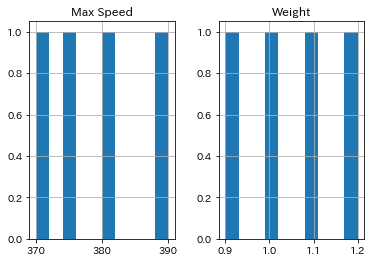

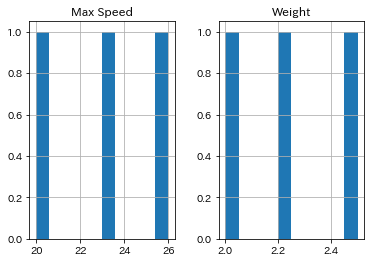

In [257]:
# hist でグループごとにヒストグラムを作成できる
df.groupby("Animal").hist()

Falcon         AxesSubplot(0.1,0.15;0.363636x0.75)
Parrot    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

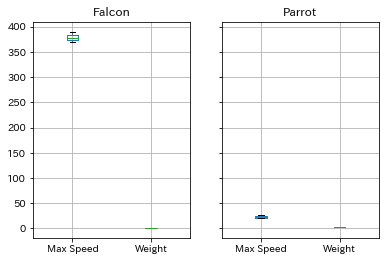

In [258]:
# boxplot で箱ヒゲ図を作成できる
df.groupby("Animal").boxplot()

変数
最高気温    AxesSubplot(0.125,0.125;0.775x0.755)
最高湿度    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

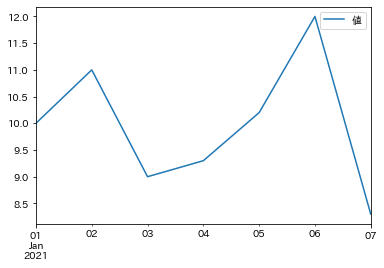

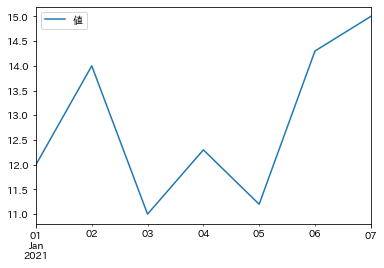

In [259]:
# plot でグループごとに折れ線グラフを作成できる
df_time.groupby("変数").plot()

In [260]:
# idxmax でグループごとに最大値を取るインデックスを取得できる
print(df.groupby("Animal").idxmax())

        Max Speed  Weight
Animal                   
Falcon          5       4
Parrot          6       6


In [261]:
# idxmin でグループごとに最小値を取るインデックスを取得できる
print(df.groupby("Animal").idxmin())

        Max Speed  Weight
Animal                   
Falcon          4       2
Parrot          1       3


In [262]:
# sample でグループごとにランダムに指定した数のデータを取得できる
print(df.groupby("Animal").sample(n=2))

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
5  Falcon      390.0     1.1
1  Parrot       20.0     2.2
3  Parrot       23.0     2.0


In [264]:
print(df.groupby("Animal").sample(frac=0.8))

   Animal  Max Speed  Weight
0  Falcon      375.0     1.0
5  Falcon      390.0     1.1
2  Falcon      380.0     0.9
3  Parrot       23.0     2.0
6  Parrot       26.0     2.5


# Time-Series

In [265]:
print(df_time.groupby("変数").diff())

              値
2021-01-01  NaN
2021-01-02  1.0
2021-01-03 -2.0
2021-01-04  0.3
2021-01-05  0.9
2021-01-06  1.8
2021-01-07 -3.7
2021-01-01  NaN
2021-01-02  2.0
2021-01-03 -3.0
2021-01-04  1.3
2021-01-05 -1.1
2021-01-06  3.1
2021-01-07  0.7


In [266]:
print(df_time.groupby("変数").pct_change())

                   値
2021-01-01       NaN
2021-01-02  0.100000
2021-01-03 -0.181818
2021-01-04  0.033333
2021-01-05  0.096774
2021-01-06  0.176471
2021-01-07 -0.308333
2021-01-01       NaN
2021-01-02  0.166667
2021-01-03 -0.214286
2021-01-04  0.118182
2021-01-05 -0.089431
2021-01-06  0.276786
2021-01-07  0.048951


In [267]:
print(df_time.groupby("変数").resample("2D").agg(np.mean))

                     値
変数                    
最高気温 2021-01-01  10.50
     2021-01-03   9.15
     2021-01-05  11.10
     2021-01-07   8.30
最高湿度 2021-01-01  13.00
     2021-01-03  11.65
     2021-01-05  12.75
     2021-01-07  15.00


In [268]:
df_time.groupby("変数").resample("2D").mean()

値
変数                    
最高気温 2021-01-01  10.50
     2021-01-03   9.15
     2021-01-05  11.10
     2021-01-07   8.30
最高湿度 2021-01-01  13.00
     2021-01-03  11.65
     2021-01-05  12.75
     2021-01-07  15.00

In [269]:
# mad で、平均絶対偏差を取ることができる
print(df_time.groupby("変数").resample("0.5D").interpolate().drop(columns="変数"))

                              値
変数                             
最高気温 2021-01-01 00:00:00  10.00
     2021-01-01 12:00:00  10.50
     2021-01-02 00:00:00  11.00
     2021-01-02 12:00:00  10.00
     2021-01-03 00:00:00   9.00
     2021-01-03 12:00:00   9.15
     2021-01-04 00:00:00   9.30
     2021-01-04 12:00:00   9.75
     2021-01-05 00:00:00  10.20
     2021-01-05 12:00:00  11.10
     2021-01-06 00:00:00  12.00
     2021-01-06 12:00:00  10.15
     2021-01-07 00:00:00   8.30
最高湿度 2021-01-01 00:00:00  12.00
     2021-01-01 12:00:00  13.00
     2021-01-02 00:00:00  14.00
     2021-01-02 12:00:00  12.50
     2021-01-03 00:00:00  11.00
     2021-01-03 12:00:00  11.65
     2021-01-04 00:00:00  12.30
     2021-01-04 12:00:00  11.75
     2021-01-05 00:00:00  11.20
     2021-01-05 12:00:00  12.75
     2021-01-06 00:00:00  14.30
     2021-01-06 12:00:00  14.65
     2021-01-07 00:00:00  15.00


In [270]:
# shift でデータをずらすことができる
print(df_time.groupby("変数").shift(1))

               値
2021-01-01   NaN
2021-01-02  10.0
2021-01-03  11.0
2021-01-04   9.0
2021-01-05   9.3
2021-01-06  10.2
2021-01-07  12.0
2021-01-01   NaN
2021-01-02  12.0
2021-01-03  14.0
2021-01-04  11.0
2021-01-05  12.3
2021-01-06  11.2
2021-01-07  14.3


In [271]:
# shift でデータをずらすことができる
print(df_time.groupby("変数").shift(-1))

               値
2021-01-01  11.0
2021-01-02   9.0
2021-01-03   9.3
2021-01-04  10.2
2021-01-05  12.0
2021-01-06   8.3
2021-01-07   NaN
2021-01-01  14.0
2021-01-02  11.0
2021-01-03  12.3
2021-01-04  11.2
2021-01-05  14.3
2021-01-06  15.0
2021-01-07   NaN


In [272]:
# ペアデータを用意する必要がある
# df_5.groupby("Animal").corrwith(oter)

# SeriesGroupBy Only

In [273]:
# グループごとにユニークな値を取得できる
print(df.groupby("Animal")["Max Speed"].unique())

Animal
Falcon    [375.0, 380.0, 370.0, 390.0]
Parrot              [20.0, 23.0, 26.0]
Name: Max Speed, dtype: object


In [274]:
# nlargest で大きい順に n 個のデータを取得できる
print(df.groupby("Animal")["Max Speed"].nlargest(n=2))

Animal   
Falcon  5    390.0
        2    380.0
Parrot  6     26.0
        3     23.0
Name: Max Speed, dtype: float64


In [275]:
# nsmallest で小さい順に n 個のデータを取得できる
print(df.groupby("Animal")["Max Speed"].nsmallest(n=2))

Animal   
Falcon  4    370.0
        0    375.0
Parrot  1     20.0
        3     23.0
Name: Max Speed, dtype: float64


In [276]:
# nunique でユニークな要素の数を取得できる
print(df.groupby("Animal")["Max Speed"].nunique())

Animal
Falcon    4
Parrot    3
Name: Max Speed, dtype: int64


In [277]:
# value_counts で要素ごとの数を取得できる
df.groupby("Animal")["Max Speed"].value_counts()

Animal  Max Speed
Falcon  370.0        1
        375.0        1
        380.0        1
        390.0        1
Parrot  20.0         1
        23.0         1
        26.0         1
Name: Max Speed, dtype: int64

In [278]:
# is_monotonic_increasing で要素が単調増加しているかどうかがわかる
df_time.groupby("変数")["値"].is_monotonic_increasing

変数
最高気温    False
最高湿度    False
Name: 値, dtype: bool

In [279]:
# is_monotonic_decreasing で要素が単調現象しているかどうかがわかる
df_5.groupby("Animal")["Max Speed"].is_monotonic_decreasing

Animal
Falcon    False
Parrot    False
Name: Max Speed, dtype: bool